In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from imblearn.over_sampling import RandomOverSampler 
sns.set(style="whitegrid")
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
df["Response"].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [7]:
value_counts = df["Response"].value_counts()

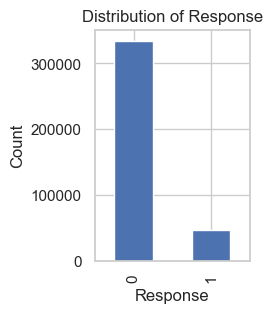

In [8]:
plt.figure(figsize=(2,3))
value_counts.plot(kind="bar")
plt.xlabel("Response")
plt.ylabel("Count")
plt.title("Distribution of Response")
plt.show()

<Axes: >

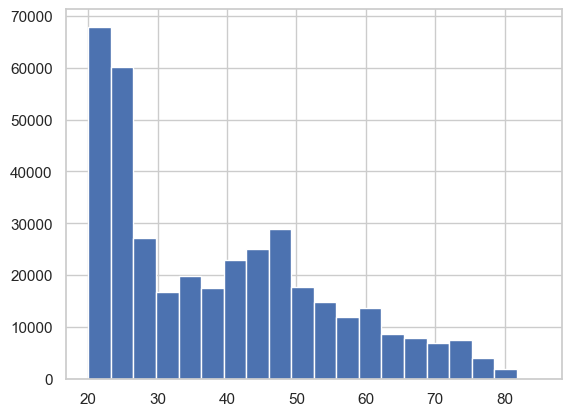

In [9]:
df["Age"].hist(bins=20)

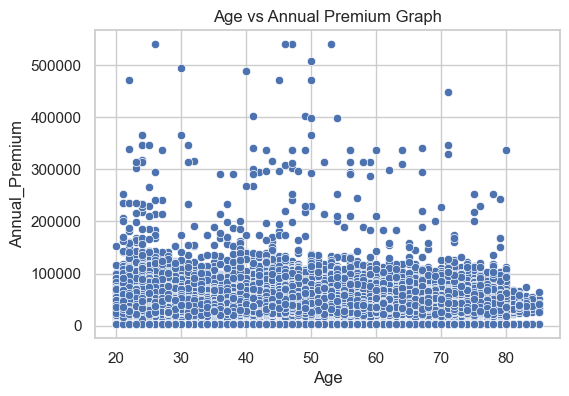

In [10]:
# Scatter_plot
plt.figure(figsize=(6,4))
sns.scatterplot(x="Age", y="Annual_Premium",data=df)
plt.xlabel("Age")
plt.ylabel("Annual_Premium")
plt.title("Age vs Annual Premium Graph")
plt.show()

In [11]:
for col in df.columns: 
    print(col,df[col].dtype)

id int64
Gender object
Age int64
Driving_License int64
Region_Code float64
Previously_Insured int64
Vehicle_Age object
Vehicle_Damage object
Annual_Premium float64
Policy_Sales_Channel float64
Vintage int64
Response int64


In [15]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler
ss= StandardScaler()
mm =MinMaxScaler()
df["Annual_Premium"]= mm.fit_transform(df[["Annual_Premium"]])
df["Age"]= mm.fit_transform(df[["Age"]])
le = LabelEncoder()
df['Gender'] = le.fit_transform(df["Gender"])
df["Vehicle_Damage"] = le.fit_transform(df["Vehicle_Damage"])
df["Vehicle_Age"].value_counts()
df["Vehicle_Age"] = df["Vehicle_Age"].replace('1-2 Year',2)
df["Vehicle_Age"] = df["Vehicle_Age"].replace('< 1 Year',1)
df["Vehicle_Age"] = df["Vehicle_Age"].replace('> 2 Years',3)


In [16]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,0.369231,1,28.0,0,3,1,0.070366,26.0,217,1
1,2,1,0.861538,1,3.0,0,2,0,0.057496,26.0,183,0
2,3,1,0.415385,1,28.0,0,3,1,0.066347,26.0,27,1
3,4,1,0.015385,1,11.0,1,1,0,0.048348,152.0,203,0
4,5,0,0.138462,1,41.0,1,1,0,0.046259,152.0,39,0


In [17]:
from sklearn.model_selection import train_test_split
x = df.drop("Response",axis=1)
y = df[["Response"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier()

random_search = {
    'n_estimators': [50, 100],     # less trees
    'max_depth': [10, 20],         # limit tree depth
    'min_samples_split': [5],      # fewer splits to evaluate
    'min_samples_leaf': [2]        # reduce complexity
}

model = RandomizedSearchCV(
    estimator=clf,
    param_distributions=random_search,
    n_iter=5,
    cv=3,
    error_score='raise',  # fail fast
    verbose=1,
    random_state=42,
    n_jobs=-1
)

model.fit(x_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=RandomForestClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20],
                                        'min_samples_leaf': [2],
                                        'min_samples_split': [5],
                                        'n_estimators': [50, 100]},
                   random_state=42, verbose=1)

In [ ]:
best_params = model.best_params_
print("best HyperParameteres",best_params)

In [ ]:
import pickle
filename = "rf_model.pkl"
pickle.dump(model,open(filename,"wb"))

In [ ]:
rf_load = model.load(open(filename,"rb"))

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))